<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_R/Titanic_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

titanic3.csv 데이터 전처리 작업 : 결측치, 이상치




In [48]:
titanic <- read.csv("titanic3.csv")
titanic <- titanic[ ,!names(titanic) %in% c("boat","body","home.dest") ]
str(titanic)

'data.frame':	1309 obs. of  11 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex     : chr  "female" "male" "female" "male" ...
 $ age     : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : chr  "24160" "113781" "113781" "113781" ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked: chr  "S" "S" "S" "S" ...


In [49]:
titanic$pclass <- as.factor(titanic$pclass)
titanic$sex <- as.factor(titanic$sex)
titanic$embarked <- as.factor(titanic$embarked)
titanic$survived <- factor(titanic$survived, levels=c(0,1), labels=c("dead","survived"))
str(titanic)

'data.frame':	1309 obs. of  11 variables:
 $ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "dead","survived": 2 2 1 1 1 2 2 1 2 1 ...
 $ name    : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : chr  "24160" "113781" "113781" "113781" ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked: Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...


In [50]:
 levels(titanic$embarked)
 table(titanic$embarked)

[1] ""  "C" "Q" "S"


      C   Q   S 
  2 270 123 914 

" "값이 2개 존재하고 있음을 알 수 있다.

read.csv()가 CSV파일을 그대로 불러들이는 점을 생각해보면, 빈 문자열 " "은 NA를 의미함을 알 수 있다.

In [51]:
levels(titanic$embarked)[1] <- NA    #1열인 " "를 NA로 변환
table(titanic$embarked, useNA="always")    #useNA="always는 NA 개수도 출력


   C    Q    S <NA> 
 270  123  914    2 

In [53]:
str(titanic)

'data.frame':	1309 obs. of  11 variables:
 $ pclass  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ survived: Factor w/ 2 levels "dead","survived": 2 2 1 1 1 2 2 1 2 1 ...
 $ name    : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : chr  "24160" "113781" "113781" "113781" ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked: Factor w/ 3 levels "C","Q","S": 3 3 3 3 3 3 3 3 3 1 ...


View(titanic)은 colab에서 미지원함

In [ ]:
#install.packages("dlookr")  #패키지 설치
library(dlookr)
diagnose(titanic)

diagnose() 는 데이터프레임의 변수를 진단하며, 반환하는 객체의 변수는 다음과 같다.

variables : 변수명

types : 변수의 데이터 유형

missing_count : 결측치 수

unique_count : 유일값의 수

unique_rate : 유일값의 비율 (=unique_count/관측치 수)

In [56]:
install.packages("naniar")
library(naniar)
n_miss(titanic)  #결측치(NA) 갯수
miss_var_summary(titanic)  #변수별 결측치(NA) 현황

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘visdat’, ‘UpSetR’




[1] 266

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
age,263,20.09167303
embarked,2,0.15278839
fare,1,0.07639419
pclass,0,0.00000000
survived,0,0.00000000
name,0,0.00000000
sex,0,0.00000000
sibsp,0,0.00000000
parch,0,0.00000000


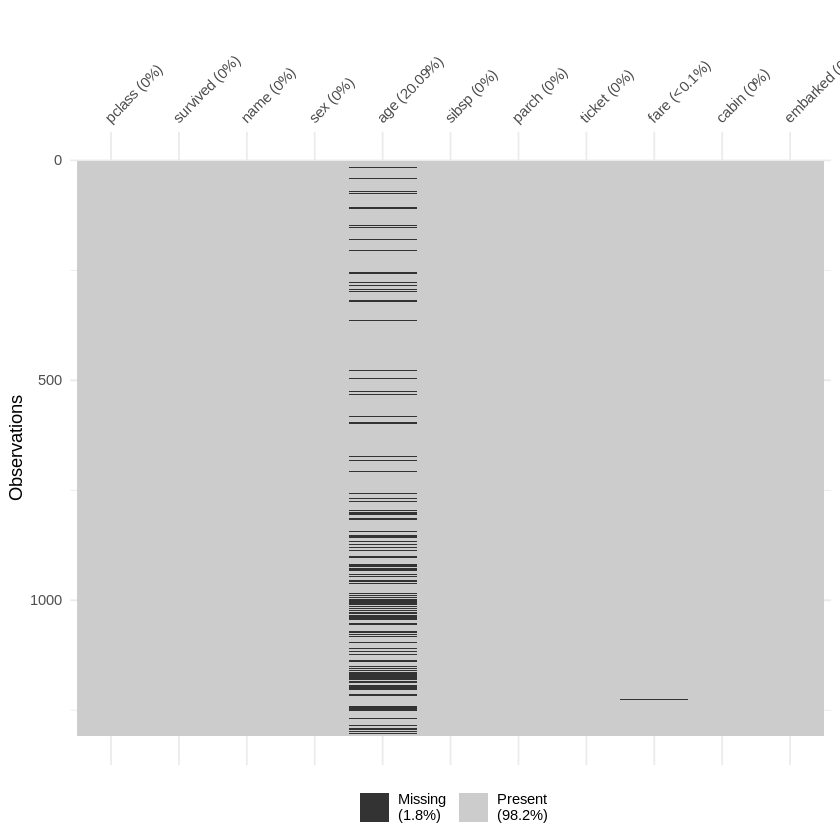

In [59]:
 vis_miss(titanic)  #결측치(NA) 패턴 시각화

In [60]:
apply(titanic,2,function(x) sum(is.na(x)))  #2는 변수 열별로 함수를 적용 #sum(is.na(x))는 x데이터에 존재하는 NA값 개수의 합계를 구함

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0      263        0        0        0 
    fare    cabin embarked 
       1        0        2

***********결측치 제거*****************

In [ ]:
titanic1 <- titanic[complete.cases(titanic),]
diagnose(titanic1)

In [ ]:
titanic2 <- na.omit(titanic)
diagnose(titanic2)

complete.cases()를 사용하여 결측치가 2개, 1개 존재하는 9열(fare)과 11열(embarked) 변수의 결측치를 제거

In [63]:
titanic <- titanic[complete.cases(titanic[ ,9]), ]
titanic <- titanic[complete.cases(titanic[ ,11]), ]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   29.81   39.00   80.00     263 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 263 rows containing non-finite values (stat_bin).”


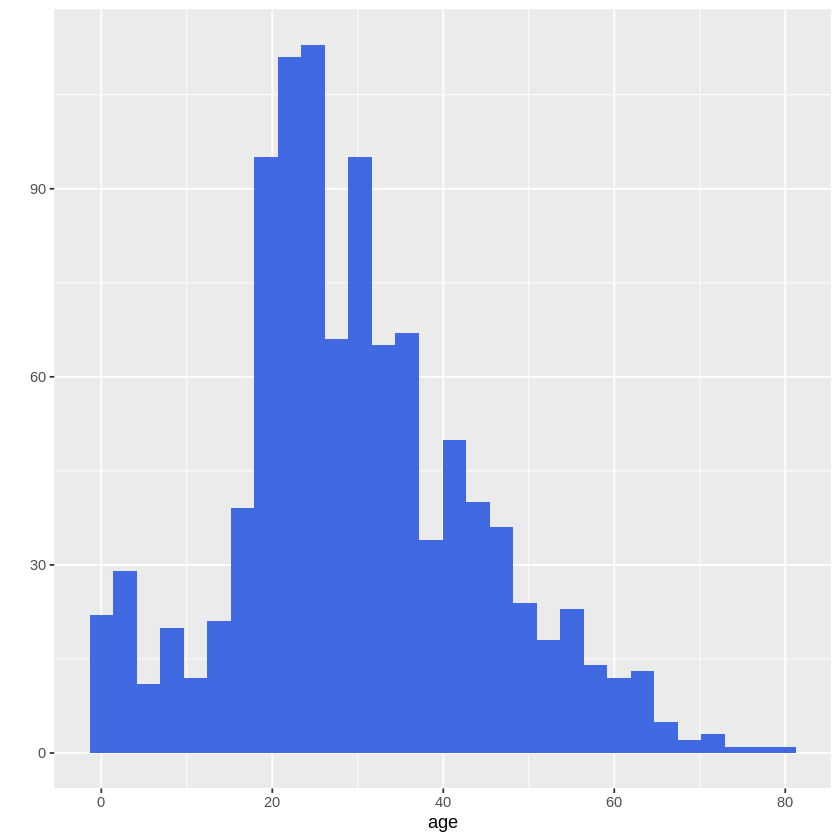

In [64]:
library(ggplot2) 
summary(titanic$age)
ggplot(titanic,aes(x=age)) + geom_histogram(fill='royalblue') + ylab('') + xlab("age")

1. imputate_na() : dlookr 패키지의 imputate_na() 는 변수에 포함된 결측치를 대체한다.

In [ ]:
titanic$age <- imputate_na(titanic, age, method = "mean")  #age변수의 결측치를 평균으로 대체
summary(titanic$age)  #변수열 대체 확인

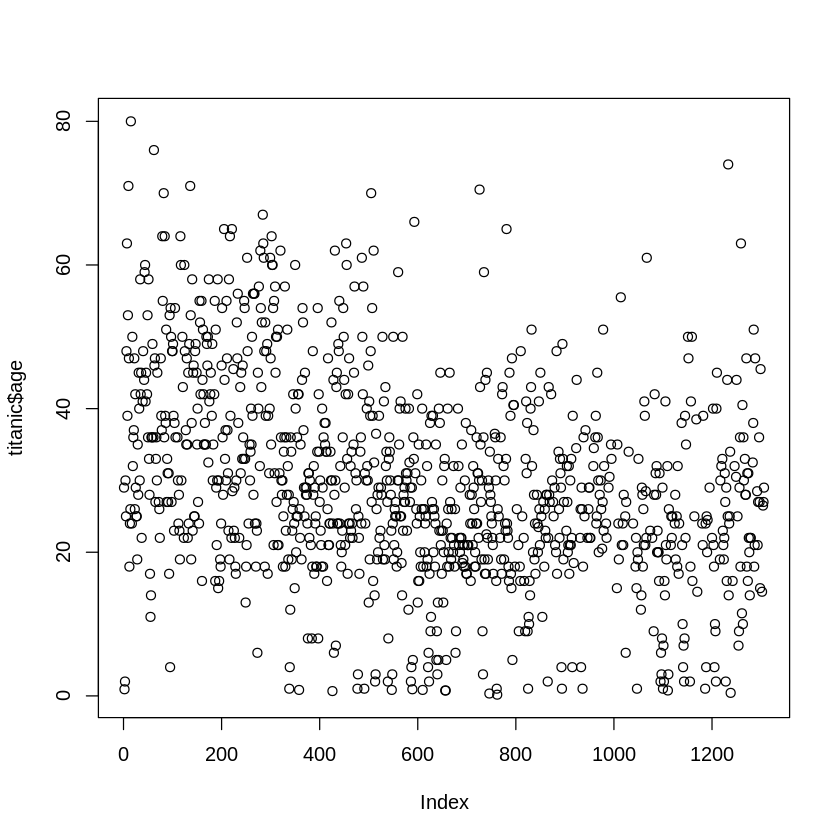

In [66]:
plot(titanic$age)

In [ ]:
diagnose(titanic)

2. DMwR 패키지 활용

In [ ]:
#install.packages("DMwR2")
library(DMwR2)
titanic <- centralImputation(titanic)   #결측치를 중위수(중앙값)로 대체
diagnose(titanic)